# Final Project Notebook

Zachary Zelensky

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
import glob
import os
import csv


#code to make plots look fancy from Jacob Turner

#fig_width_pt = 245.3  # Get this from LaTeX using \showthe\columnwidth
fig_width_pt = 350

inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (math.sqrt(5.0)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 12,
        'axes.titlesize':13,
        'lines.markersize': 4,
        'font.size': 12,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'savefig.dpi':400,
        'path.simplify':True,
        'font.family': 'serif',
        'font.serif':'Times',
        #'mathtext.fontset':'dejavuserif',
        #'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':False,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'orangered', 'darkblue', \
        #                        'darkcyan', 'y','orange','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)
%matplotlib inline

In [1]:
#saves plot titles with your pulsar
Pulsar_Name="J2313+4253"

In [172]:
#data available upon request
#data_dir='J2313+4253_sData.csv'
#data_dir='/home/jovyan/work/shared/PSC/scintillation/20m_observations/J2313+4253/J2313+4253.csv'
#df = pd.read_csv(data_dir)

#if there are multiple pulsars in the file
#df.set_index("Pulsar", inplace = True)
#df = df.loc[Pulsar_Name]
 
#print(df)


#df
#print(df['MJD'])

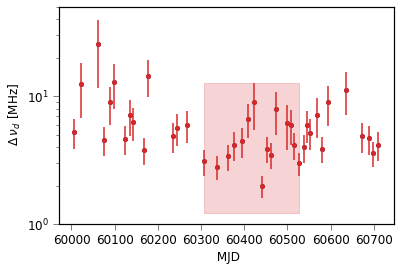

Output file: J2313+4253LBandlogplotbox.png


In [157]:
#create vars from data
x=df['MJD']
y=df['L SBW']
yerr=df['L SBWerr']
#plot
fig, ax = plt.subplots()
fig = plt.scatter(x,y)
plt.errorbar(x,y,yerr,fmt="o",color="C3",label =r'Lorentzian') #$\Delta\, \nu_{d}$')
plt.axis
ax.set_yscale('log')
#ax.set_xscale('log')
#create a shaded region
aaa=[60306
,    60338
,    60362
,    60377
,    60394
,    60410
,    60423
,    60442
,    60454
,    60463
,    60473
,    60500
,    60509
,    60515
,    60528]
ax.fill_between(aaa, .05, .65 ,
                color='C3', alpha=0.2, transform=ax.get_xaxis_transform())
#plt.axvline(60650,linestyle="--",color='b',alpha=.5)
#plt.errorbar(60633,11.43,2.93,color='b',label="gbt",marker='s') #gbt
#plt.title(Pulsar_Name)
ax.set_xlabel(" MJD")
ax.set_ylabel(r" $\Delta\, \nu_{d}$ [MHz]")
plt.ylim(1,50)
#plt.legend(loc ="upper right",fancybox=True, framealpha=0.8, shadow=True,borderpad=0.5,fontsize=11) 
plt.savefig(Pulsar_Name+'1LBandlogplotbox.png',bbox_inches='tight');plt.show();plt.close()
print("Output file: "+Pulsar_Name+'LBandlogplotbox.png')
#print(y)

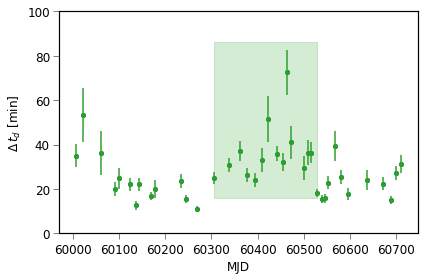

Output file: J2313+4253L_scintTimeboxed.jpg


In [158]:
#creating a graph of data timescale
fig, ax = plt.subplots()
y=df['L ScintTime']
yerr=df['L ScintTimerr']
fig = plt.scatter(x,y)
plt.errorbar(x,y,yerr,fmt="o",color="C2",label =r'Lorentzian')
plt.axis
#ax.set_yscale('log')
#ax.set_xscale('log')
aaa=[60306
,    60338
,    60362
,    60377
,    60394
,    60410
,    60423
,    60442
,    60454
,    60463
,    60473
,    60500
,    60509
,    60515
,    60528]
ax.fill_between(aaa, .16, .86 ,
                color='C2', alpha=0.2, transform=ax.get_xaxis_transform())

#plt.title(Pulsar_Name)
plt.xlabel("MJD")
plt.ylabel(r"$\Delta\, t_{d}$ [min]")
plt.ylim(0,100)
#plt.ylim(0,80)
#plt.legend(loc ="upper right",fancybox=True, framealpha=0.8, shadow=True,borderpad=0.5,fontsize=11)
plt.tight_layout()
plt.savefig(Pulsar_Name+'Timebox.jpg', transparent=True)
plt.show();plt.close()
print("Output file: "+Pulsar_Name+'L_scintTimeboxed.jpg')

## Scipy optimize

[0.04161694 1.46845665 0.33769938]


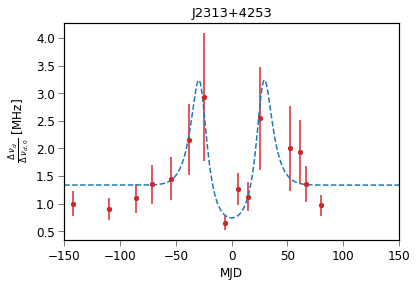

Output file: J2313+4253LBand.png
[0.04161694 1.46845665 0.33769938]
Degrees of freedom: 12
1.4353230885222388


In [69]:
from scipy.optimize import curve_fit
from scipy.stats import chisquare

#get only event data
xdata=(60306,60338,60362,60377,60394,60410,60423,60442,60454,60463,60473,60500,60509,60515,60528)
y1data=(3.100000,2.800000,3.400000,4.200000,4.500000,6.700000,9.100000,2.000000,3.900000,3.500000,7.900000,6.200000,6.000000,4.200000,3.000000)
y1err=(0.700000,0.600000,0.800000,1.100000,1.200000,2.000000,3.600000,0.400000,0.900000,0.800000,2.900000,2.400000,1.800000,1.000000,0.600000)
xdata1=[]
ydata=[]
yerr=[]
#scale and shift
for i in range(len(xdata)):
    xdata1.append(xdata[i]-60448)#60448#60454
    ydata.append(y1data[i]/(3.1))
    yerr.append(y1err[i]/(3.1))
    


#create gpl model
def f(u,b,a,C):
    return (1/(1+(1-2*np.square(b*u))*a*(np.exp(-np.square(b*u)))))+C
#inital guess
p0=[.05,5/7,1]
#fit
curve_fit(f,xdata1,ydata,p0)
#get parameters
popt, pcov = curve_fit(f, xdata1, ydata,p0)
#plotting
fig = plt.scatter(xdata1,ydata)
plt.errorbar(xdata1,ydata,yerr,fmt="o",color="C3",label =r'Lorentzian') #$\Delta\, \nu_{d}$')
plt.axis
print(popt)
# Generate y values for the fitted curve
u=np.linspace(-200,200,10000)
y=(1/(1+(1-2*np.square(popt[0]*u))*popt[1]*(np.exp(-np.square(popt[0]*u)))))+popt[2]
plt.plot(u,y,linestyle='--')
plt.xlim(-150,150)
# Plot the original data and the fitted curve
#plt.plot(xdata1, yfit, label='Data')
#plt.plot(xdata, yfit, 'r-', label='Fit')

plt.title(Pulsar_Name)
plt.xlabel("MJD")
plt.ylabel(r" $\frac{\Delta\, \nu_{d}}{\Delta\, \nu_{d,0}}$ [MHz]")
#plt.legend(loc ="upper left",fancybox=True, framealpha=0.8, shadow=True,borderpad=0.5,fontsize=11) 
plt.savefig('optimize.png',bbox_inches='tight') ;
plt.show();plt.close()
print("Output file: "+Pulsar_Name+'LBand.png')
print(popt)

# Calculate the residuals
res=[]
for i in range(len(ydata)):
    u=xdata1[i]
    y=(1/(1+(1-2*np.square(popt[0]*u))*popt[1]*(np.exp(-np.square(popt[0]*u)))))+popt[2]
    residuals = (ydata[i] - y)**2/yerr[i]**2
    res.append(residuals)
# Calculate the chi-squared statistic
chisq = np.sum(res)
#print(chisq)
degree=len(xdata)-len(popt)
#print("Chi-squared:", chisq)
#print("Chi-squared from scipy:", chisq_stats.statistic)
print("Degrees of freedom:", degree)
print(chisq/degree)

[0.04094408 1.63888141]


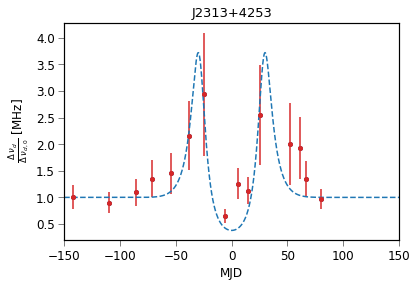

Output file: J2313+4253LBand.png
[0.04094408 1.63888141]
Degrees of freedom: 13
1.527179380441828


In [61]:
#same thing without the +c param

from scipy.optimize import curve_fit
from scipy.stats import chisquare

xdata=(60306,60338,60362,60377,60394,60410,60423,60442,60454,60463,60473,60500,60509,60515,60528)
y1data=(3.100000,2.800000,3.400000,4.200000,4.500000,6.700000,9.100000,2.000000,3.900000,3.500000,7.900000,6.200000,6.000000,4.200000,3.000000)
y1err=(0.700000,0.600000,0.800000,1.100000,1.200000,2.000000,3.600000,0.400000,0.900000,0.800000,2.900000,2.400000,1.800000,1.000000,0.600000)
xdata1=[]
ydata=[]
yerr=[]
for i in range(len(xdata)):
    xdata1.append(xdata[i]-60448)#60448#60454
    ydata.append(y1data[i]/(3.1))
    yerr.append(y1err[i]/(3.1))
    



def f(u,b,a):
    return (1/(1+(1-2*np.square(b*u))*a*(np.exp(-np.square(b*u)))))
p0=[.05,5/7]
curve_fit(f,xdata1,ydata,p0)

popt, pcov = curve_fit(f, xdata1, ydata,p0)

fig = plt.scatter(xdata1,ydata)
plt.errorbar(xdata1,ydata,yerr,fmt="o",color="C3",label =r'Lorentzian') #$\Delta\, \nu_{d}$')
plt.axis
print(popt)
# Generate y values for the fitted curve
u=np.linspace(-200,200,10000)
y=(1/(1+(1-2*np.square(popt[0]*u))*popt[1]*(np.exp(-np.square(popt[0]*u)))))
plt.plot(u,y,linestyle='--')
plt.xlim(-150,150)
# Plot the original data and the fitted curve
#plt.plot(xdata1, yfit, label='Data')
#plt.plot(xdata, yfit, 'r-', label='Fit')

plt.title(Pulsar_Name)
plt.xlabel("MJD")
plt.ylabel(r" $\frac{\Delta\, \nu_{d}}{\Delta\, \nu_{d,0}}$ [MHz]")
#plt.legend(loc ="upper left",fancybox=True, framealpha=0.8, shadow=True,borderpad=0.5,fontsize=11) 
#plt.savefig(Pulsar_Name+'LpscBand.png',bbox_inches='tight') ;
plt.show();plt.close()
print("Output file: "+Pulsar_Name+'LBand.png')
print(popt)

# Calculate the residuals
res=[]
for i in range(len(ydata)):
    u=xdata1[i]
    y=(1/(1+(1-2*np.square(popt[0]*u))*popt[1]*(np.exp(-np.square(popt[0]*u)))))
    residuals = (ydata[i] - y)**2/yerr[i]**2
    res.append(residuals)
# Calculate the chi-squared statistic
chisq = np.sum(res)
#print(chisq)
degree=len(xdata)-len(popt)
#print("Chi-squared:", chisq)
#print("Chi-squared from scipy:", chisq_stats.statistic)
print("Degrees of freedom:", degree)
print(chisq/degree)

## MCMC

In [71]:
#get the functions adapting from ultranest tutorial
import numpy as np
#from numpy import pi, sin
#gpl
def sine_model1(x,b,a,C):
    gauss=(1/(1+(1-2*np.square(b*x))*a*(np.exp(-np.square(b*x)))))+C
    return gauss
#pure noise
def sine_model0(x, B):
    return B + x*0

In [72]:
#redifine some data
x = xdata1
y=ydata
yerr = yerr
x=np.array(x)
y=np.array(y)
yerr=np.array(yerr)
print(yerr)
print(y)
print(x)

[0.22580645 0.19354839 0.25806452 0.35483871 0.38709677 0.64516129
 1.16129032 0.12903226 0.29032258 0.25806452 0.93548387 0.77419355
 0.58064516 0.32258065 0.19354839]
[1.         0.90322581 1.09677419 1.35483871 1.4516129  2.16129032
 2.93548387 0.64516129 1.25806452 1.12903226 2.5483871  2.
 1.93548387 1.35483871 0.96774194]
[-142 -110  -86  -71  -54  -38  -25   -6    6   15   25   52   61   67
   80]


In [73]:
#set up param
parameters1 = ['b','a','C']

#priors
def prior_transform1(cube):
    params = cube.copy()

    # transform b parameter: uniform prior
    lo = 0
    hi = .09
    params[0] = cube[0] * (hi - lo) + lo

    # transform a parameter: uniform prior
    lo = .2
    hi = 7
    params[1] = cube[1] * (hi - lo) + lo
    
    # transform c parameter: uniform prior
    lo = 0
    hi = 2
    params[2] = cube[2] * (hi - lo) + lo


    return params

parameters0 = ['B']

def prior_transform0(cube):
    # the argument, cube, consists of values from 0 to 1
    # we have to convert them to physical scales

    params = cube.copy()
    # let background level go from -10 to +10
    params[0] = cube[0] * 20 - 10
    return params


In [74]:
#set up likelyhoood
def log_likelihood1(params):
    # unpack the current parameters:
    b,a,C=params

    # compute for each x point, where it should lie in y
    y_model = sine_model1(x,b=b,a=a,C=C)
    # compute likelihood
    loglike = -0.5 * (((y_model - y) / yerr)**2).sum()

    return loglike

def log_likelihood0(params):
    B = params

    y_model = sine_model0(x, B=B)
    # compute likelihood
    loglike = -0.5 * (((y_model - y) / yerr)**2).sum()

    return loglike

In [75]:
#get the sampler
import ultranest

sampler1 = ultranest.ReactiveNestedSampler(parameters1, log_likelihood1, prior_transform1)

sampler0 = ultranest.ReactiveNestedSampler(parameters0, log_likelihood0, prior_transform0)

In [76]:
#sample
result1 = sampler1.run(min_num_live_points=400)
sampler1.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6  02 [-6.0891..-6.0890]*| it/evals=4080/10265 eff=41.3583% N=400  00 0  
[ultranest] Likelihood function evaluations: 10285
[ultranest]   logZ = -11.7 +- 0.08673
[ultranest] Effective samples strategy satisfied (ESS = 1797.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.10 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.

logZ = -11.681 +- 0.289
  single instance: logZ = -11.681 +- 0.102
  bootstrapped   : logZ = -11.702 +- 0.288
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    b                   : 0.0000│▁▁▁  ▁▁▁ ▁▁▁▂▂▄▄▆▇▇▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁│0.0900    0.0426 +- 0.0088
    a                   : 0.20  │▁▂▃▅▅▇▇▇▆▃▁▁   ▁▁    ▁ ▁▁  ▁    ▁ ▁  ▁ │6.16      1.12 +- 0.37
    C                   : 0.000 │

In [77]:
#sample
result0 = sampler0.run(min_num_live_points=400)
sampler0.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01   [-12.8033..-12.8033]*| it/evals=3200/3706 eff=96.7937% N=400   0 0 
[ultranest] Likelihood function evaluations: 3716
[ultranest]   logZ = -17.45 +- 0.08666
[ultranest] Effective samples strategy satisfied (ESS = 1297.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.10 bs:0.09 tail:0.03 total:0.09 required:<0.50
[ultranest] done iterating.

logZ = -17.460 +- 0.159
  single instance: logZ = -17.460 +- 0.102
  bootstrapped   : logZ = -17.449 +- 0.156
  tail           : logZ = +- 0.034
insert order U test : converged: True correlation: inf iterations

    B                   : 0.739 │ ▁▁▁▁▁▁▁▂▂▃▃▄▄▆▅▆▇▇▇▆▆▆▅▄▂▃▁▁▁▁▁▁▁▁▁ ▁ │1.308     1.005 +- 0.073



In [78]:
#lets get a bayes factor
K = np.exp(result1['logz'] - result0['logz'])
print("K = %.2f" % K)
print("The GPL is %.2f times more probable than the no-signal model" % K)
print("assuming the models are equally probable a priori.")

K = 323.22
The GPL is 323.22 times more probable than the no-signal model
assuming the models are equally probable a priori.


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


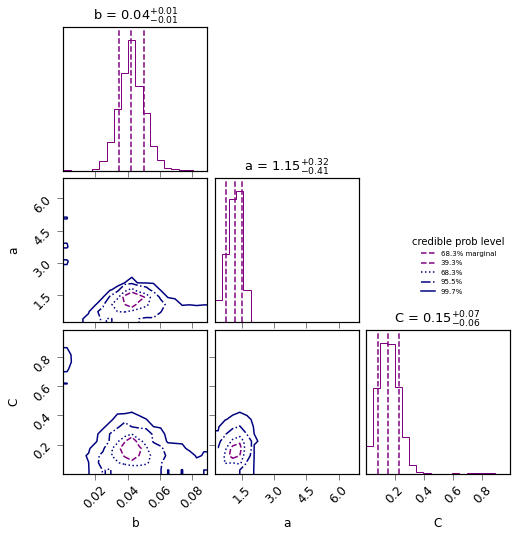

In [79]:
#get the corner plot
from ultranest.plot import cornerplot
cornerplot(result1)
plt.savefig('mccorner',bbox_inches='tight');plt.show();plt.close()

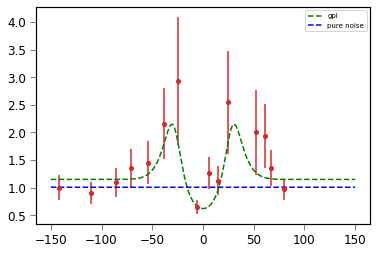

In [81]:
#plot best param
plt.errorbar(xdata1,ydata,yerr,fmt="o",color="C3") #$\Delta\, \nu_{d}$')
u=np.linspace(-150,150,10000)
bmc=.04
amc=1.12
cmc=.15
yplt=(1/(1+(1-2*np.square(bmc*u))*amc*(np.exp(-np.square(bmc*u)))))+cmc
yplt2=sine_model0(u,1.009)
plt.plot(u,yplt,linestyle='--',color='g',label='gpl')
plt.plot(u,yplt2,linestyle='--',color='b',label='pure noise')
plt.xlabel("MJD")
plt.ylabel(r" $\frac{\Delta\, \nu_{d}}{\Delta\, \nu_{d,0}}$ [MHz]")
plt.legend()
plt.savefig('mcmc.png',bbox_inches='tight');plt.show();plt.close()

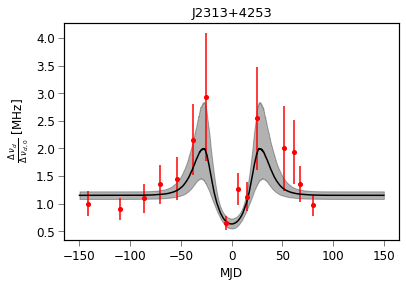

In [83]:
#from ultra nest tutorial
plt.figure()
plt.title(Pulsar_Name)
plt.xlabel("MJD")
plt.ylabel(r" $\frac{\Delta\, \nu_{d}}{\Delta\, \nu_{d,0}}$ [MHz]")
plt.errorbar(x, y, yerr,
             marker='o', ls=' ', color='red')


u=np.linspace(-150,150,10000)

from ultranest.plot import PredictionBand
band = PredictionBand(u)

# go through the solutions
for b, a, C in sampler1.results['samples']:
    # compute for each time the y value
    band.add(sine_model1(u, b=b, a=a, C=C))

band.line(color='k')
# add 1 sigma quantile
band.shade(color='k', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
#band.shade(q=0.49, color='gray', alpha=0.2)
plt.savefig('mcshade.png',bbox_inches='tight');plt.show();plt.close()

In [5]:
#N_o calculation 
lb=21.4 #cm
D=1.03 #kpc
A=15.6 #au
alpha=1.12
N0=3.6*alpha*(1/lb**2)*(1/D)*(A**2)
print(N0,'cm^-3 pc')

2.0801993136298003 cm^-3 pc


## Extra

In [159]:
x=df['MJD']
y=df['L SBW']
yerr=df['L SBWerr']

Gaussian Bandwidth 4.8 +/- 1.4 MHz               New weighted error
25


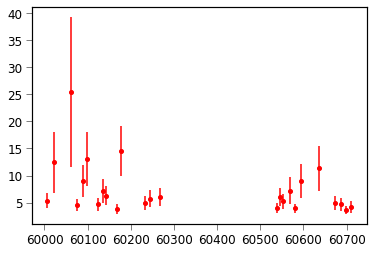

In [160]:
xnew=x[:14].append(x[29:])
ynew=y[:14].append(y[29:])
yerr=yerr[:14].append(yerr[29:])
plt.errorbar(xnew,ynew,yerr,marker='o', ls=' ', color='red')
#cacluates the weighted mean
Derrg=yerr
D1=ynew
mjd=xnew

Derr2=np.square(Derrg)

top=D1/Derr2
bot=1/Derr2

#weighted uncertainty
err=np.sqrt(1/(np.sum(bot)))
err3=round(err,1)
weighted_err_GSBW = round(np.sqrt(np.sum((1/Derrg**2)*(Derrg**2))/np.sum(1/Derrg**2)),1)

#weighted mean
mean3=(np.sum(top)/np.sum(bot))
m3=round(mean3,1)
print("Gaussian Bandwidth",m3,"+/-",weighted_err_GSBW,"MHz               New weighted error")
print(len(xnew))

In [161]:
#if this is gaussian data then we can use
from scipy import optimize
from scipy.stats import norm
from scipy.stats import uniform
#likelyhood from lecture 6
#creating a log likelyhood funciton from hw3 
def gauss_likely(mu, x, dx):
    return np.sum(((x - mu) / (2 * dx)) ** 2 - (1 / np.sqrt(2 * np.pi * dx))) #contains gauss log likely constant with negative

# getting our fsquared 
f_squared = lambda beta: gauss_likely(beta[0], x=ynew, dx=yerr)
#optimizing likelyhood
beta0 = (4,.43) #guess at mean and sd
beta_squared = optimize.fmin(f_squared, beta0)
print( "mean is",beta_squared[0],"+/-",beta_squared[1])

Optimization terminated successfully.
         Current function value: -0.805583
         Iterations: 54
         Function evaluations: 107
mean is 4.772773838363356 +/- 0.3552738309926574


(3.0, 7.0)

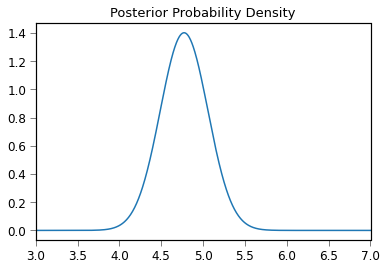

In [162]:
#3 setting up the bayesian posterior
#using the example in lecture 8

#create a grid of possible mu
xgrid = np.linspace(3, 7, 1000) 
# likelihood for gaussian
def gauss_likely(mu,x,dx):
    dist = np.exp(-0.5 * np.sum(((x - mu) / dx) ** 2))
    return dist

# prior need to be uniform
def prior(theta,mu,sc):
    # put a prior distribution here
    dist =uniform.pdf(theta,loc=mu - sc/2, scale=sc)
    return dist

# get the likelyhood for each mu
likelyhood = np.array( [gauss_likely(mu, ynew, yerr) for mu in xgrid])


prdist=prior(xgrid,m3,4)
#plt.plot(xgrid,prdist)
proba1 = (likelyhood*prdist)#formula for a posteior dist
normp1=proba1/np.trapz(proba1,xgrid)#normalize
# posterior plot
plt.plot(xgrid, normp1)
plt.title("Posterior Probability Density")
plt.xlim(3,7)

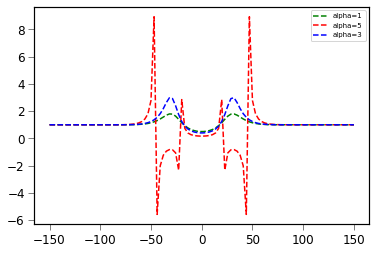

In [163]:
u=np.linspace(-150,150,100)
bmc=.04
amc=1
cmc=0
yplt=(1/(1+(1-2*np.square(bmc*u))*amc*(np.exp(-np.square(bmc*u)))))+cmc
plt.plot(u,yplt,linestyle='--',color='g',label="alpha=1")
plt.legend()
bmc=.04
amc=5
yplt=(1/(1+(1-2*np.square(bmc*u))*amc*(np.exp(-np.square(bmc*u)))))+cmc
plt.plot(u,yplt,linestyle='--',color='r',label="alpha=5")
plt.legend()
bmc=.04
amc=1.5
yplt=(1/(1+(1-2*np.square(bmc*u))*amc*(np.exp(-np.square(bmc*u)))))+cmc
plt.plot(u,yplt,linestyle='--',color='b',label="alpha=3")
plt.legend()

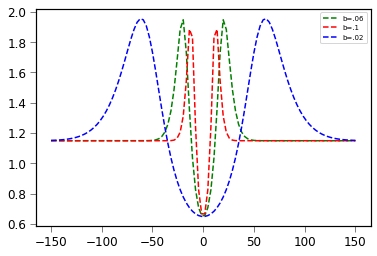

In [164]:
u=np.linspace(-150,150,100)
bmc=.06
amc=1
cmc=.15
yplt=(1/(1+(1-2*np.square(bmc*u))*amc*(np.exp(-np.square(bmc*u)))))+cmc
plt.plot(u,yplt,linestyle='--',color='g',label="b=.06")
plt.legend()
bmc=.1
amc=1
cmc=.15
yplt=(1/(1+(1-2*np.square(bmc*u))*amc*(np.exp(-np.square(bmc*u)))))+cmc
plt.plot(u,yplt,linestyle='--',color='r',label="b=.1")
plt.legend()
bmc=.02
amc=1
cmc=.15
yplt=(1/(1+(1-2*np.square(bmc*u))*amc*(np.exp(-np.square(bmc*u)))))+cmc
plt.plot(u,yplt,linestyle='--',color='b',label="b=.02")
plt.legend()

In [167]:
from scipy import stats
import numpy as np

# Sample data for two independent groups
group1 =ynew
group2 = (3.100000,2.800000,3.400000,4.200000,4.500000,6.700000,9.100000,2.000000,3.900000,3.500000,7.900000,6.200000,6.000000,4.200000,3.000000)

# Perform the unpaired t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check for significance at a 0.05 alpha level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.")

T-statistic: 2.090509377149524
P-value: 0.043314136720970224
Reject the null hypothesis: There is a significant difference between the means of the two groups.


In [168]:
x=df['MJD']
y=df['L ScintTime']
yerr=df['L ScintTimerr']

xnew=x[:14].append(x[29:])
ynew=y[:14].append(y[29:])
yerr=yerr[:14].append(yerr[29:])

In [169]:
from scipy import stats
import numpy as np

# Sample data for two independent groups
group1 =ynew
group2 = (24.76,30.8,37.13,26.27,24.11,32.9,51.54,35.83,32.07,72.6,41.09,29.32,36.36,36.36,18.07)

# Perform the unpaired t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check for significance at a 0.05 alpha level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.")

T-statistic: -1.2080026743529098
P-value: 0.23451072378782636
Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.
